# Import Libraries

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv('Fashion_Retail_Sales.csv')
df

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash
...,...,...,...,...,...,...
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash


In [3]:
df.shape

(3400, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Reference ID,3400.0,4039.660588,48.122583,3957.0,3997.0,4040.0,4081.00,4122.0
Purchase Amount (USD),2750.0,156.709818,419.536669,10.0,57.0,110.0,155.75,4932.0
Review Rating,3076.0,2.999057,1.156505,1.0,2.0,3.0,4.00,5.0


In [6]:
df.sample

<bound method NDFrame.sample of       Customer Reference ID Item Purchased  Purchase Amount (USD)  \
0                      4018        Handbag                 4619.0   
1                      4115          Tunic                 2456.0   
2                      4019       Tank Top                 2102.0   
3                      4097       Leggings                 3126.0   
4                      3997         Wallet                 3003.0   
...                     ...            ...                    ...   
3395                   4118         Shorts                   37.0   
3396                   4056       Slippers                  176.0   
3397                   3991         Onesie                    NaN   
3398                   4042        Sandals                  128.0   
3399                   4001       Backpack                  115.0   

     Date Purchase  Review Rating Payment Method  
0       05-02-2023            NaN    Credit Card  
1       11-07-2023            2.0    

In [7]:
df.nunique()

Customer Reference ID    166
Item Purchased            50
Purchase Amount (USD)    234
Date Purchase            365
Review Rating             41
Payment Method             2
dtype: int64

## Exploratory Data Analysis

In [8]:
df.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Converting to DateTime

In [10]:
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='%d-%m-%Y')
df['Date Purchase']

0      2023-02-05
1      2023-07-11
2      2023-03-23
3      2023-03-15
4      2022-11-27
          ...    
3395   2023-07-09
3396   2023-03-16
3397   2022-10-03
3398   2023-01-01
3399   2023-03-22
Name: Date Purchase, Length: 3400, dtype: datetime64[ns]

In [11]:
df['Month'] = df['Date Purchase'].dt.month_name()
df['Month']

0       February
1           July
2          March
3          March
4       November
          ...   
3395        July
3396       March
3397     October
3398     January
3399       March
Name: Month, Length: 3400, dtype: object

In [12]:
df['Week'] = df['Date Purchase'].dt.day_name()
df['Week']

0          Sunday
1         Tuesday
2        Thursday
3       Wednesday
4          Sunday
          ...    
3395       Sunday
3396     Thursday
3397       Monday
3398       Sunday
3399    Wednesday
Name: Week, Length: 3400, dtype: object

## Visualization

### 1. Sales By Weekday

In [13]:
weekday_sales = df.groupby('Week')['Purchase Amount (USD)'].sum()

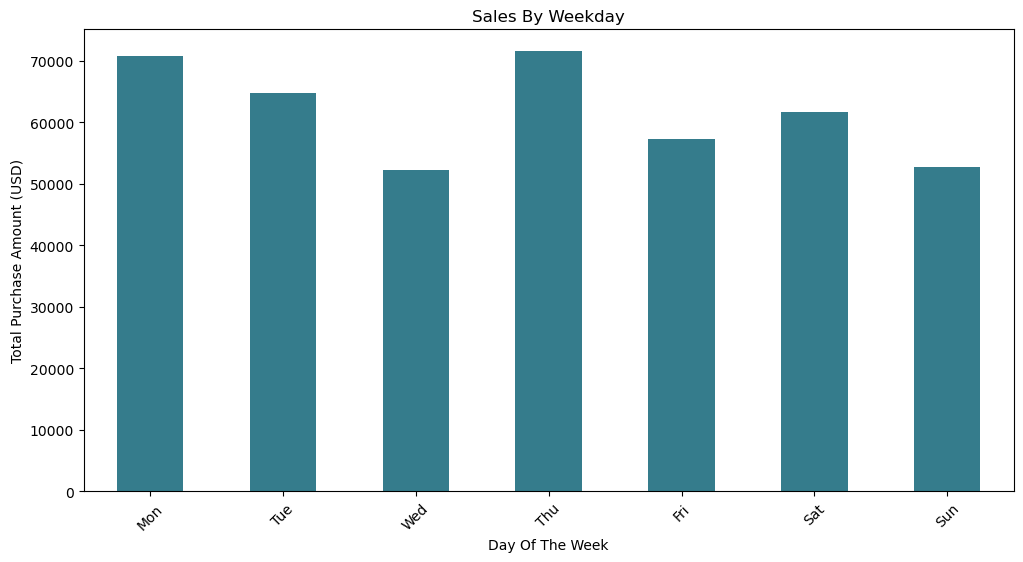

In [66]:
weekday_sales.plot(kind='bar', color='#357C8C', figsize=(12, 6))
plt.title('Sales By Weekday')
plt.xlabel('Day Of The Week')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

### 2. Sales By Month

In [21]:
monthly_sales = df.groupby('Month')['Purchase Amount (USD)'].sum()

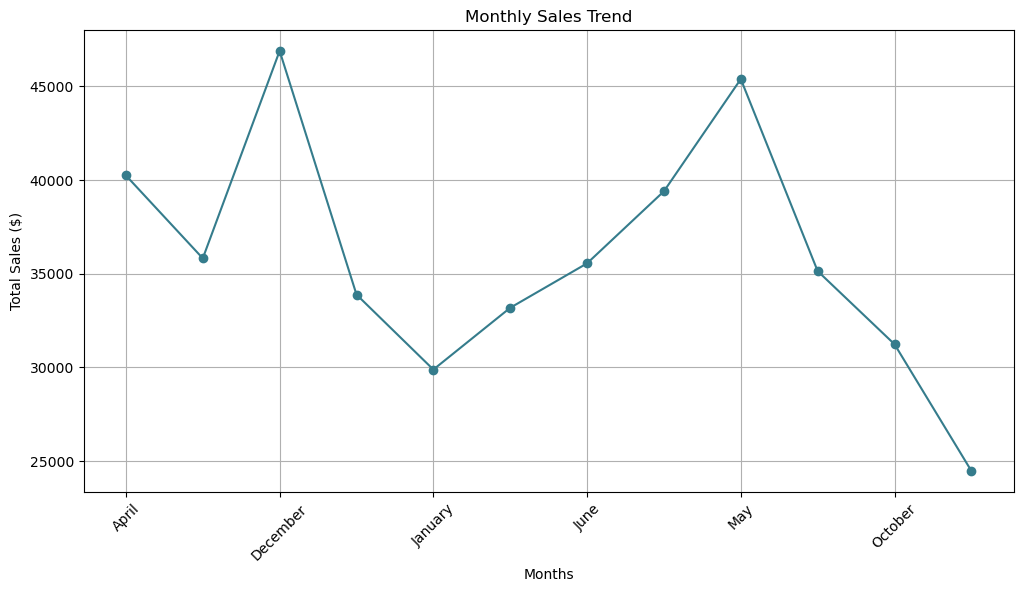

In [67]:
monthly_sales.plot(kind='line', marker='o', color='#357C8C', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 3. Top Selling Items

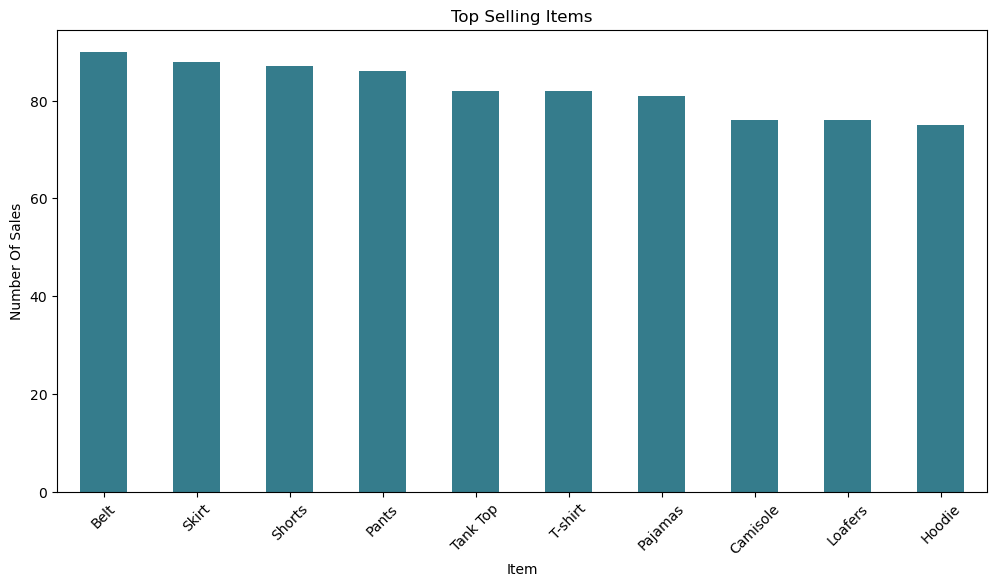

In [68]:
df['Item Purchased'].value_counts().head(10).plot(kind='bar', color='#357C8C', figsize=(12, 6))
plt.title('Top Selling Items')
plt.xlabel('Item')
plt.ylabel('Number Of Sales')
plt.xticks(rotation=45)
plt.show()

### 4. Total Revenue By Items

In [37]:
top_revenue_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
top_revenue_items

Item Purchased
Tunic         17275.0
Jeans         13068.0
Pajamas       12798.0
Shorts        12702.0
Handbag       12668.0
Gloves        12330.0
Boots         11891.0
Poncho        11422.0
Flip-Flops    11309.0
Slippers      11284.0
Name: Purchase Amount (USD), dtype: float64

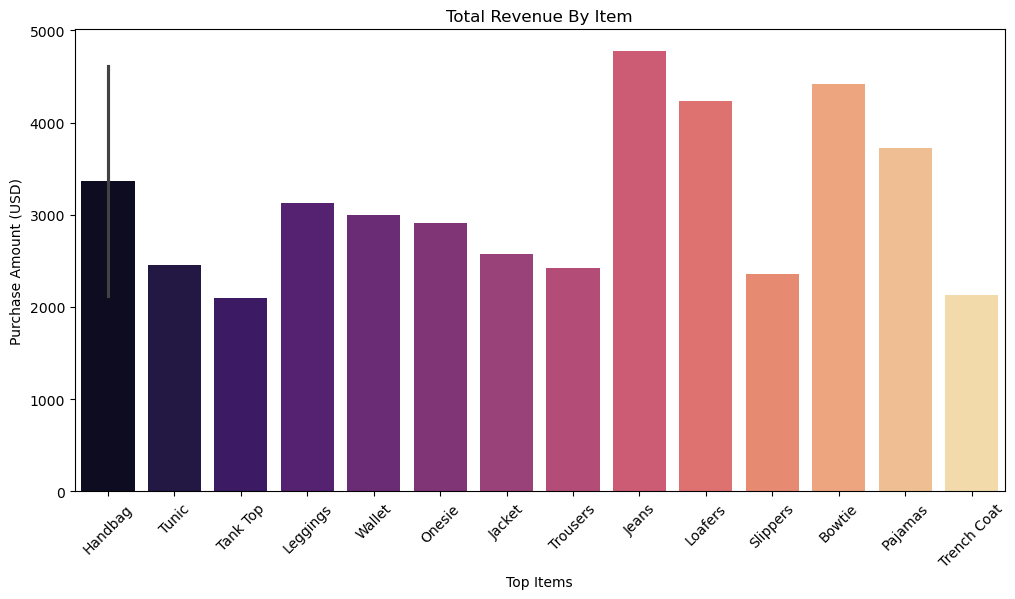

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Item Purchased'].head(15), y=df['Purchase Amount (USD)'], palette='magma')
plt.title('Total Revenue By Item')
plt.xlabel('Top Items')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

### 5. Payment MethodS

In [76]:
pay_meth = df['Payment Method'].value_counts()

In [77]:
colors = ['#27708C', '#539DA6', '#75BFB8', '#F2F2F2', '#89D9CA', '#357C8C', '#175973', '#152623']

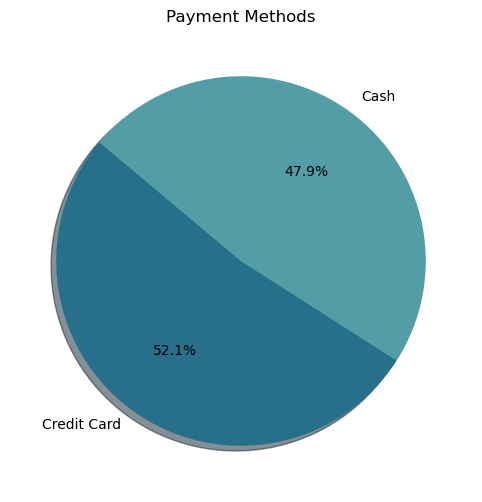

In [79]:
plt.figure(figsize=(12, 6))
plt.pie(pay_meth, labels=pay_meth.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Payment Methods')
plt.show()

### 6. Payment Method vs Purchase Amount (USD)

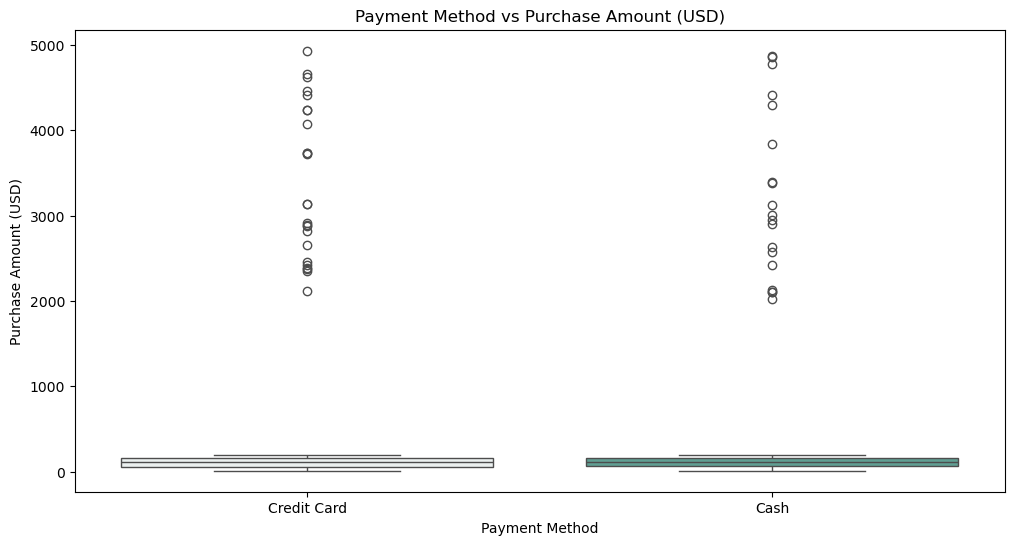

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Payment Method', y='Purchase Amount (USD)', palette='light:#5A9')
plt.title('Payment Method vs Purchase Amount (USD)')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.show()

### 7. Purchase Amount (USD) vs Review Ratings

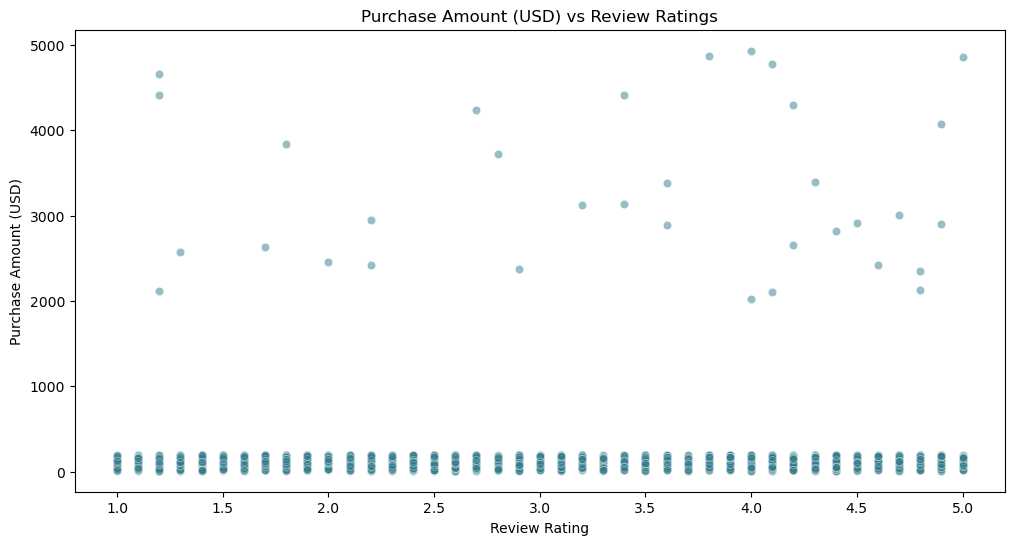

In [82]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Review Rating'], y=df['Purchase Amount (USD)'], alpha=0.5, color='#357C8C')
plt.title('Purchase Amount (USD) vs Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [83]:
df

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Month,Week
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card,February,Sunday
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,July,Tuesday
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,March,Thursday
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,March,Wednesday
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,November,Sunday
...,...,...,...,...,...,...,...,...
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash,July,Sunday
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash,March,Thursday
3397,3991,Onesie,NaN,2022-10-03,2.4,Credit Card,October,Monday
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash,January,Sunday


## Predictive Modeling

### 1. Train Test Split

In [84]:
df = df.drop(['Customer Reference ID'], axis=1)

In [114]:
val = {'Payment Method': {'Credit Card': 0, 'Cash': 1}, 
       'Month': {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11},
      'Week': {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}, 'Review Rating': {'NaN': 0}}
df.replace(val, inplace=True)
df.dropna(inplace=True)
df

,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Month,Week
1,Tunic,2456.0,2023-07-11,2.0,0,6,2
2,Tank Top,2102.0,2023-03-23,4.1,1,2,4
3,Leggings,3126.0,2023-03-15,3.2,1,2,3
4,Wallet,3003.0,2022-11-27,4.7,1,10,0
5,Onesie,2914.0,2022-12-11,4.5,0,11,0
...,...,...,...,...,...,...,...
3394,Tank Top,113.0,2023-01-20,1.2,0,0,5
3395,Shorts,37.0,2023-07-09,2.7,1,6,0
3396,Slippers,176.0,2023-03-16,2.5,1,2,4
3398,Sandals,128.0,2023-01-01,1.8,1,0,0


In [115]:
features = ['Purchase Amount (USD)', 'Review Rating', 'Payment Method', 'Month', 'Week']
target = 'Item Purchased'

X = df[features]
y = df[target]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1989, 5) (498, 5)


### 2. Models

In [119]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [120]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.024096385542168676

 Decison Tree Accuracy: 0.028112449799196786

 Random Forest Accuracy: 0.018072289156626505

 Gradient Boosting Accuracy: 0.04618473895582329

 K-Nearest Neighbors Accuracy: 0.03815261044176707

 Support Vector Machine Accuracy: 0.014056224899598393


#### Best Model

In [121]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.014056224899598393


### 3. Classification Report

In [122]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
                precision    recall  f1-score   support

     Backpack       0.00      0.00      0.00         9
         Belt       0.00      0.00      0.00        11
       Blazer       0.00      0.00      0.00        13
       Blouse       0.00      0.00      0.00         8
        Boots       0.00      0.00      0.00         7
       Bowtie       0.00      0.00      0.00         9
     Camisole       0.00      0.00      0.00        15
     Cardigan       0.00      0.00      0.00        12
         Coat       0.00      0.00      0.00         7
        Dress       0.00      0.00      0.00        11
Flannel Shirt       0.00      0.00      0.00         9
   Flip-Flops       0.00      0.00      0.00         9
       Gloves       0.00      0.00      0.00        11
      Handbag       0.00      0.00      0.00        13
          Hat       0.00      0.00      0.00        11
       Hoodie       0.00      0.00      0.00        12
       Jacket       0.00      0.00   

### 4. Confusion Matrix

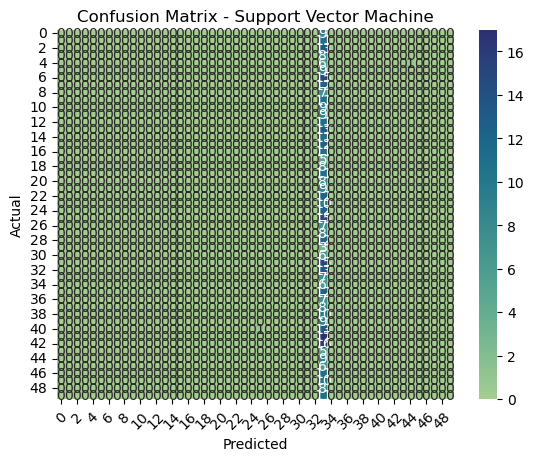

In [124]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.show()